# Procesamiento del Lenguaje Natural
## Clasificación de sentimientos en opiniones


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN, LSTM, GRU, Bidirectional, Dropout
from tensorflow.keras import backend, optimizers, callbacks
from tensorflow.keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Obtención de los datos.
# Con numeroPalabras establecemos un límite del numero de palabras que tomaremos
# en cuenta. En IMDB las palabras del vocabulario se encuentran ordenadas por frecuencia
# de aparición. Al asignar num_words en 10,000 indicaremos que
# consideraremos únicamente las primeras 10,000 palabras que más se repiten.
numeroPalabras = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = numeroPalabras)

17464789/17464789 [==============================] - 2s 0us/step


In [4]:
# Tamaño del conjunto de entrenamiento.
x_train.shape

(25000,)

In [5]:
# Maneras de sacar caracteristicas del texto:
### - Vectorización (indices de las palabras) (diferentes tamaños)
### - BoW
### - Vectorizacion con padding (mismos tamaños)

# Así se encuentra codificada una opinión en IMDB
# Esto contiene vectores
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
# La longitud de las opiniones cambia.

# EJERCICIO
# Inspecciona diferentes reseñas y corrobora como cambian sus tamaños.
print(len(x_train[0]))
print(len(x_train[1]))

218
189


In [7]:
# Visualización de las etiquetas
print(y_train[0])
print(y_train[1])

1
0


## Decodificación de las opiniones

In [8]:
# Diccionario de palabras.
# Con este diccionario accedemos a los índices de las palabra.
diccionarioPalabras = imdb.get_word_index()

1641221/1641221 [==============================] - 1s 1us/step


In [9]:
# Obtención del índice asignado a la palabra "movie".
diccionarioPalabras['the']

1

In [10]:
# Diccionario para acceder a la palabra a través del índice.
indice2palabra = dict([(indice, palabra) for (palabra, indice) in diccionarioPalabras.items()])

In [11]:
# La palabra "movie" se encuentra en el lugar 17 de las que más se repiten.
indice2palabra

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [12]:
print(indice2palabra[52027])
print(indice2palabra.get(52027))

complainers
complainers


In [13]:
# EJERCICIO
# ¿Cúal es la palabra que más se usa en las reseñas? (las que mas se repiten)
indice2palabra[1]

'the'

In [14]:
# Recuerda que a los índices reales de las palabras se les ha sumado 3
# para evitar confundirlos con los índices 0, 1 y 2 que estan destinados a:
# 0 -> palabras desconocidas
# 1 -> palabra de inicio de todos los vectores de opiniones
# 2 -> palabras fuera de las 10,000 que hemos indicado al inicio del ejercicio
opinionDecodificada = ' '.join([indice2palabra.get(i-3, '?') for i in x_train[0]])

# texto sin puntuaciones
print(opinionDecodificada)


? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

## Preprocesamiento de los datos

In [15]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [16]:
# agregando padding
max_length = 300  # máximo tamaño de secuencia
padded_x_train = pad_sequences(x_train, maxlen = max_length)
padded_x_test = pad_sequences(x_test, maxlen = max_length)

In [17]:
padded_x_train.shape

(25000, 300)

In [18]:
padded_x_test.shape

(25000, 300)

In [19]:
padded_x_test[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

## Creación del modelo

Ejemplos de RNN: LSTM o GRU

### Simple RNN

In [31]:
# Con esta instrucción eliminamos información previa de los modelos.
backend.clear_session()

In [32]:
embedding_dim = 150 # dimensión del vector embedding
max_words = numeroPalabras # número de palabras a considerar

In [33]:
# Definición del modelo
modeloBi = Sequential()
modeloBi.add(Embedding(input_dim = max_words, output_dim = embedding_dim, input_length = max_length))
modeloBi.add(SimpleRNN(40))
modeloBi.add(Dense(30, activation = 'sigmoid'))
modeloBi.add(Dense(1, activation = 'sigmoid'))

modeloBi.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 150)          1500000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 40)                7640      
                                                                 
 dense (Dense)               (None, 30)                1230      
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1508901 (5.76 MB)
Trainable params: 1508901 (5.76 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
# Optimizador
Adam = optimizers.Adam(learning_rate=0.001)

In [35]:
# Compilación del modelo
modeloBi.compile(optimizer=Adam, loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
checkpointer = callbacks.ModelCheckpoint('modeloSimpleRNN.h5', monitor = 'val_accuracy',
                                         save_best_only = True, mode = 'max')

In [37]:
# Entrenamiento del modelo
H = modeloBi.fit(padded_x_train, y_train,
                 validation_data = (padded_x_test, y_test),
                 epochs = 5,
                 batch_size = 100,
                 callbacks = [checkpointer])

Epoch 1/5
250/250 [==============================] - 164s 419ms/step - loss: 0.5489 - accuracy: 0.7091 - val_loss: 0.4146 - val_accuracy: 0.8216
Epoch 2/5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


250/250 [==============================] - 83s 332ms/step - loss: 0.3835 - accuracy: 0.8394 - val_loss: 0.4804 - val_accuracy: 0.7707
Epoch 3/5
250/250 [==============================] - 83s 334ms/step - loss: 0.4726 - accuracy: 0.7680 - val_loss: 0.5524 - val_accuracy: 0.7149
Epoch 4/5
250/250 [==============================] - 71s 286ms/step - loss: 0.3480 - accuracy: 0.8524 - val_loss: 0.4662 - val_accuracy: 0.7970
Epoch 5/5
250/250 [==============================] - 69s 275ms/step - loss: 0.2276 - accuracy: 0.9131 - val_loss: 0.4610 - val_accuracy: 0.7995


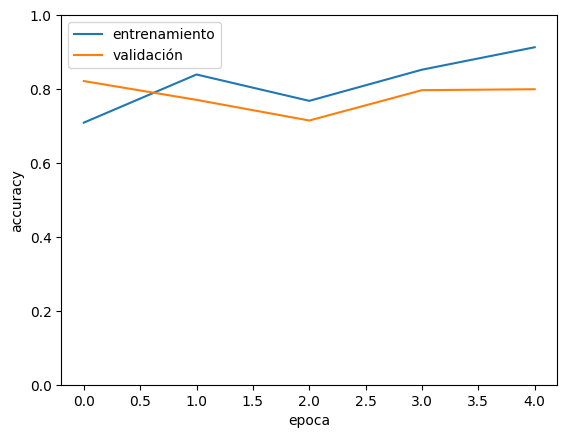

In [38]:
# Evaluar las graficas del accuracy (precisión) y del error es una buena práctica.
# Estas graficas te dicen si el modelo necesita más épocas de entrenamiento,
# si tienes overfitting o si es el óptimo.
plt.plot(H.history['accuracy'], label='entrenamiento')
plt.plot(H.history['val_accuracy'], label='validación')
plt.legend(loc='best')
plt.xlabel('epoca')
plt.ylabel('accuracy')
plt.ylim([0,1])
plt.show()

### LSTM

In [39]:
# Con esta instrucción eliminamos información previa de los modelos.
backend.clear_session()

In [40]:
embedding_dim = 150 # dimensión del vector embedding
max_words = numeroPalabras # número de palabras a considerar

In [41]:
# Definición del modelo
modeloBi = Sequential()
modeloBi.add(Embedding(input_dim = max_words, output_dim = embedding_dim, input_length = max_length))
modeloBi.add(LSTM(40))
modeloBi.add(Dense(30, activation = 'sigmoid'))
modeloBi.add(Dense(1, activation = 'sigmoid'))

modeloBi.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 150)          1500000   
                                                                 
 lstm (LSTM)                 (None, 40)                30560     
                                                                 
 dense (Dense)               (None, 30)                1230      
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1531821 (5.84 MB)
Trainable params: 1531821 (5.84 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
# Optimizador
Adam = optimizers.Adam(learning_rate=0.001)

In [43]:
# Compilación del modelo
modeloBi.compile(optimizer=Adam, loss='binary_crossentropy', metrics=['accuracy'])

In [44]:
checkpointer = callbacks.ModelCheckpoint('modeloSimpleLSTM.h5', monitor = 'val_accuracy',
                                         save_best_only = True, mode = 'max')

In [45]:
# Entrenamiento del modelo
H = modeloBi.fit(padded_x_train, y_train,
                 validation_data = (padded_x_test, y_test),
                 epochs = 5,
                 batch_size = 100,
                 callbacks = [checkpointer])

Epoch 1/5
250/250 [==============================] - 32s 117ms/step - loss: 0.5676 - accuracy: 0.6970 - val_loss: 0.5024 - val_accuracy: 0.7517
Epoch 2/5
  3/250 [..............................] - ETA: 14s - loss: 0.4433 - accuracy: 0.8200

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


250/250 [==============================] - 18s 73ms/step - loss: 0.3789 - accuracy: 0.8333 - val_loss: 0.3947 - val_accuracy: 0.8248
Epoch 3/5
250/250 [==============================] - 13s 52ms/step - loss: 0.2498 - accuracy: 0.9040 - val_loss: 0.3332 - val_accuracy: 0.8604
Epoch 4/5
250/250 [==============================] - 12s 48ms/step - loss: 0.1728 - accuracy: 0.9400 - val_loss: 0.3592 - val_accuracy: 0.8645
Epoch 5/5
250/250 [==============================] - 9s 36ms/step - loss: 0.1195 - accuracy: 0.9623 - val_loss: 0.3913 - val_accuracy: 0.8629


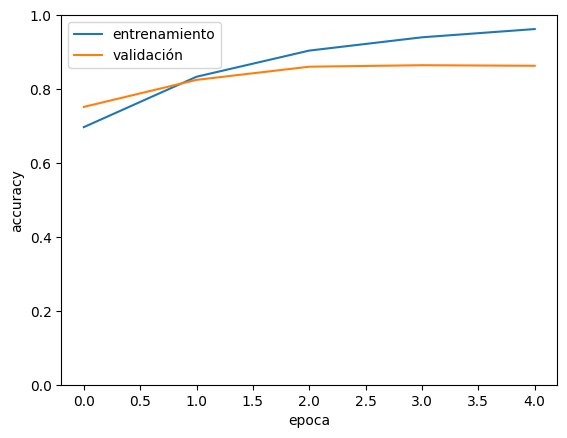

In [46]:
# Evaluar las graficas del accuracy (precisión) y del error es una buena práctica.
# Estas graficas te dicen si el modelo necesita más épocas de entrenamiento,
# si tienes overfitting o si es el óptimo.
plt.plot(H.history['accuracy'], label='entrenamiento')
plt.plot(H.history['val_accuracy'], label='validación')
plt.legend(loc='best')
plt.xlabel('epoca')
plt.ylabel('accuracy')
plt.ylim([0,1])
plt.show()

### Bidirectional LSTM

In [48]:
# Con esta instrucción eliminamos información previa de los modelos.
backend.clear_session()

In [49]:
embedding_dim = 150 # dimensión del vector embedding
max_words = numeroPalabras # número de palabras a considerar

In [50]:
# Definición del modelo
modeloBi = Sequential()
modeloBi.add(Embedding(input_dim = max_words, output_dim = embedding_dim, input_length = max_length))
modeloBi.add(Bidirectional(LSTM(40)))
modeloBi.add(Dense(30, activation = 'sigmoid'))
modeloBi.add(Dense(1, activation = 'sigmoid'))

modeloBi.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 150)          1500000   
                                                                 
 bidirectional (Bidirection  (None, 80)                61120     
 al)                                                             
                                                                 
 dense (Dense)               (None, 30)                2430      
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1563581 (5.96 MB)
Trainable params: 1563581 (5.96 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
# Optimizador
Adam = optimizers.Adam(learning_rate=0.001)

In [52]:
# Compilación del modelo
modeloBi.compile(optimizer=Adam, loss='binary_crossentropy', metrics=['accuracy'])

In [53]:
checkpointer = callbacks.ModelCheckpoint('modeloBidirectionalLSTM.h5', monitor = 'val_accuracy',
                                         save_best_only = True, mode = 'max')

In [54]:
# Entrenamiento del modelo
H = modeloBi.fit(padded_x_train, y_train,
                 validation_data = (padded_x_test, y_test),
                 epochs = 5,
                 batch_size = 100,
                 callbacks = [checkpointer])

Epoch 1/5
250/250 [==============================] - 35s 124ms/step - loss: 0.4650 - accuracy: 0.7733 - val_loss: 0.3271 - val_accuracy: 0.8671
Epoch 2/5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


250/250 [==============================] - 21s 83ms/step - loss: 0.2577 - accuracy: 0.9020 - val_loss: 0.3270 - val_accuracy: 0.8642
Epoch 3/5
250/250 [==============================] - 16s 64ms/step - loss: 0.1860 - accuracy: 0.9348 - val_loss: 0.3330 - val_accuracy: 0.8704
Epoch 4/5
250/250 [==============================] - 16s 64ms/step - loss: 0.1440 - accuracy: 0.9504 - val_loss: 0.3593 - val_accuracy: 0.8735
Epoch 5/5
250/250 [==============================] - 16s 63ms/step - loss: 0.1077 - accuracy: 0.9662 - val_loss: 0.4034 - val_accuracy: 0.8446


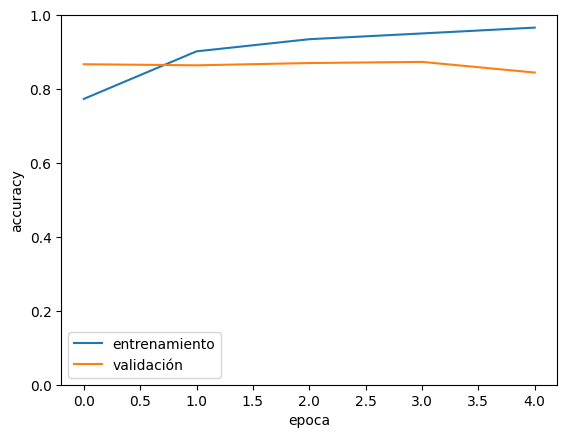

In [55]:
# Evaluar las graficas del accuracy (precisión) y del error es una buena práctica.
# Estas graficas te dicen si el modelo necesita más épocas de entrenamiento,
# si tienes overfitting o si es el óptimo.
plt.plot(H.history['accuracy'], label='entrenamiento')
plt.plot(H.history['val_accuracy'], label='validación')
plt.legend(loc='best')
plt.xlabel('epoca')
plt.ylabel('accuracy')
plt.ylim([0,1])
plt.show()

In [56]:
from tensorflow.keras.models import load_model

In [57]:
bestModel = load_model('modeloSimpleLSTM.h5')

In [58]:
# Escribe tu opinión
opinion = 'i liked the movie it was awesome'

In [61]:
# Vectoriza tu opinión
opinionVector = [int(diccionarioPalabras.get(i,-1) + 3) for i in opinion.split()]
opinionVector.insert(0, 1)
print(opinionVector)

[1, 13, 423, 4, 20, 12, 16, 1190]


In [62]:
# Estandariza/Codifica tu opinión
opinionArreglo = np.array(opinionVector).reshape(1, len(opinionVector))
print(opinionArreglo)

[[   1   13  423    4   20   12   16 1190]]


In [63]:
# Ajusta el vector con padding
opinionPadded = pad_sequences(opinionArreglo, maxlen = max_length)
print(opinionPadded)

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0   

In [70]:
# Clasifica tu opinión
opinionClasificacion = bestModel.predict(opinionPadded)
print(opinionClasificacion)
if opinionClasificacion > 0.55:
  print('opinion positiva')
elif 0.45 <= opinionClasificacion <= 0.55:
  print('opinion neutra')
elif opinionClasificacion < 0.45:
  print('opinion negativa')

1/1 [==============================] - 0s 36ms/step
[[0.94244576]]
opinion positiva
